### Question 1: Wine classification (50)

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

In [68]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets

1. Split the data into training and testing(20%). Scale the data. 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=4400)
# Scale the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

2. Fit a SVM model, using the type of wine as the target value, and Alcohol	and Malicacid as the features. Report the classification accuracy. 

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Extract features
X = X[['Alcohol', 'Malicacid']]

X = X.to_numpy()
y = y.to_numpy()

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=4400)
# Scale the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel = "linear")

# Train the classifier on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)
y_pred_scaled = svm_classifier.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print accuracy
print('classification accuracy: ', accuracy_scaled)

classification accuracy:  0.8611111111111112


3. Visualize the result from previous question. 

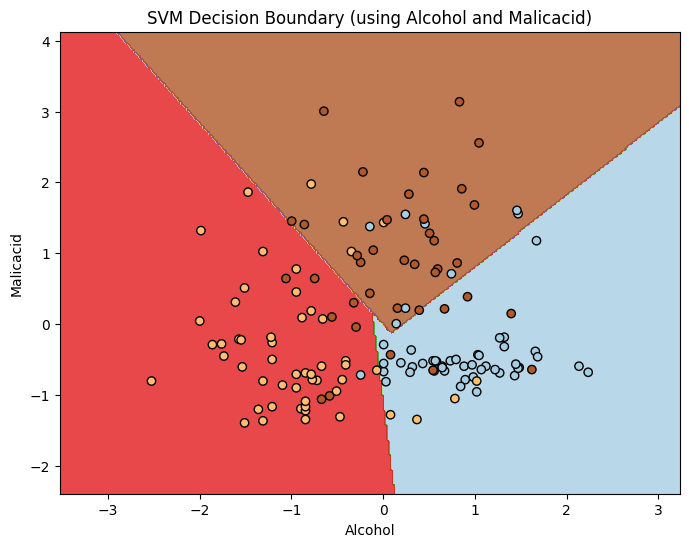

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid of points to make predictions
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the meshgrid
Z = svm_classifier.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.title('SVM Decision Boundary (using Alcohol and Malicacid)')
plt.show()

4. Fit the SVM model, using all features and type of wines as the target value. Divide the training data into training and validation. Use the validation part to tune the parameter of kernel type and the value of C and then the training part to fit the model. Report the classification report table on test data, as well as the best parameters. 

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=4400)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                    random_state=4400)
# Scale the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

# Define the hyperparameters to tune
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10]
}

# Perform grid search cross validation
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv = 5)

# find best hyperparameters
grid_search.fit(X_val_scaled, y_val)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('best params: ', best_params)

# Train the classifier on the best hyperparameters
best_classifier = SVC(**best_params)
best_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_classifier.predict(X_test_scaled)

# Print the classification report
report = classification_report(y_test, y_pred)

print('classification report:\n', report)

best params:  {'C': 0.1, 'kernel': 'linear'}
classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



5. Now, use the Alcohol as the target and all the other features as the features. Fit a SVM and report the metrics. (No need to tune the parameters)

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.svm import SVR

# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets

# Extract features
X = X.drop(columns = ['Alcohol'])
y = wine.data.features[['Alcohol']]

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=4400)
# Scale the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create an SVR regressor
svm_regressor = SVR()

# Train the classifier on the scaled training data
svm_regressor.fit(X_train_scaled, y_train)
y_pred_scaled = svm_regressor.predict(X_test_scaled)

# Print MSE
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

MSE:  118.09117222222224


### Question 2: Explain the concepts (20)

1. Explain what is margin and support vector in the SVM (5)

The margin is the distance between the separating hyperplane and the nearest data point from each class of data. Generally, we want to find a hyperplane that maximizes the margin. The support vectors are the points that are closest to the hyperplane. The support vectors are what determines the margin. Removing or chaging the location of a support vector could end up changing the margin.

2. Explain the difference and similarity between SVC and SVR (10)

Both SVC and SVR are support vector models that identify support vectors (points on/near the margin), however, SVC is used for classification tasks when the target value is categorical, while SVR is used for regression tasks when the target value is continuous. SVC finds the hyperplane that separates the data and maximizes the margin between the classes, while SVR finds the function that best fits the training data while maximizing the margin of tolerance around the predicted values.

3. Explain the difference of the definition of error in SVR and linear regression (5)

In linear regression, you want to minimize the MSE or RSS, while in SVR, you have an e-insensitive tube areound the target values, and any prediction within the tube is considered accurate and doesn't contribute to the loss function while any prediction outside the tube does. So, in SVR you want to minimize the predictions falling outside of your tube in order to minimize the loss function.

### Question 3:  KNN with regression (30)

Following is a simulation data with three features. 

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=3, noise=20, random_state=5220)
y = y + np.sin(X[:, 0] * 3) + X[:, 1] ** 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)

1. Fit a KNN model. Tune the parameter of K and distance metric (Euclidean and Manhattan). Print the MSE with the best parameter. (15) 

In [82]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1, 21),
             'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv = 5, 
                           scoring = "neg_mean_squared_error")
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter and best score from the grid search
best_params = grid_search.best_params_
print('Best parameters: ', best_param)

# Fit KNN model with the best parameter
knn_best = KNeighborsRegressor(n_neighbors = best_param['n_neighbors'],
                              metric = best_params['metric'])
knn_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test_scaled)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 5}
Mean squared error:  724.5780434114346


2. Repeat the simulation process with the number of feature equal to 10. Redo the previous question. (15)

In [83]:
# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=20, random_state=5220)
y = y + np.sin(X[:, 0] * 3) + X[:, 1] ** 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)


# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1, 21),
             'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv = 5, 
                           scoring = "neg_mean_squared_error")
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter and best score from the grid search
best_params = grid_search.best_params_
print('Best parameters: ', best_param)

# Fit KNN model with the best parameter
knn_best = KNeighborsRegressor(n_neighbors = best_param['n_neighbors'],
                              metric = best_params['metric'])
knn_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test_scaled)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 5}
Mean squared error:  9125.760810538313
